In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install missingno

In [5]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
submission = pd.read_csv("titanic/submission.csv")


print(train.shape,test.shape,submission.shape)

(891, 12) (418, 11) (418, 2)


In [6]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Taylor, Mr. Elmer Zebley",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<AxesSubplot:>

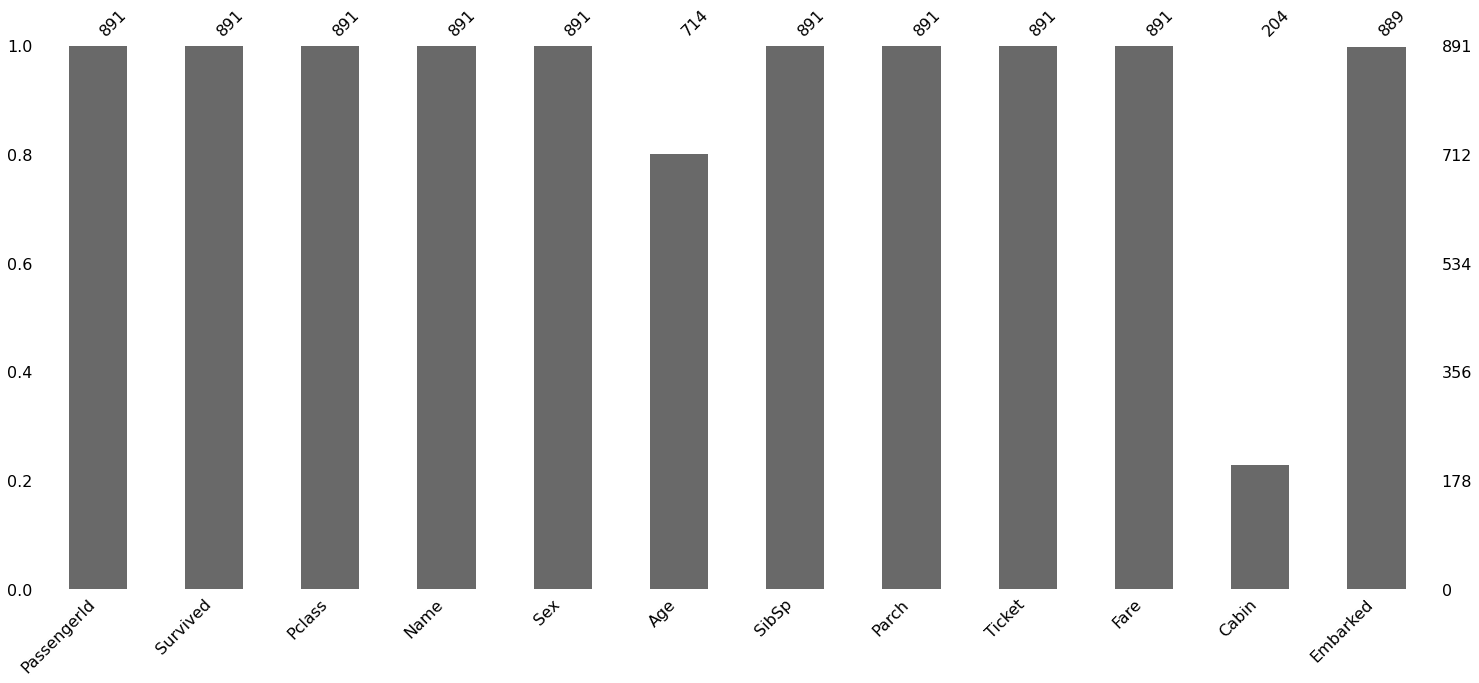

In [12]:
#결측치를 그림으로 표현

import missingno as msno

msno.bar(train)

<AxesSubplot:>

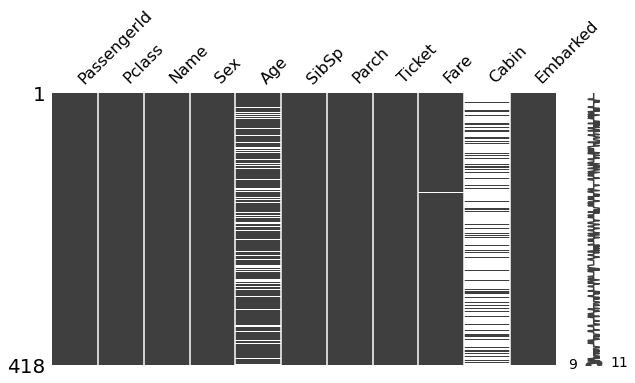

In [15]:
msno.matrix(test,figsize=(10,5))

<AxesSubplot:>

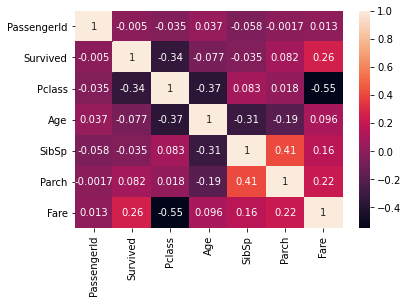

In [18]:
sns.heatmap(train.corr(),annot=True,cbar=True)

In [22]:
train['TrainSplit'] = "Train"
test['TrainSplit'] = 'Test'

data=pd.concat([train,test],axis=0) #위에서 아래방향 합치기

print(data.shape)




(1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [23]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Test


In [24]:
data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']]

data_num['Age']=data_num['Age'].fillna(data_num['Age'].mean()) #fillna는 결측치 대치
data_num['Fare']=data_num['Fare'].fillna(data_num['Fare'].mean())

#결측치를 처리하는 대표적인 2가지 방법
#1. 결측치 삭제(행전체 삭제, 다른데이터까지 날라감)
#2. 결측치 값을 평균값으로 대치


In [25]:
data_num.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0.0
1,1,38.0,1,0,71.2833,1.0
2,3,26.0,0,0,7.9250,1.0
3,1,35.0,1,0,53.1000,1.0
4,3,35.0,0,0,8.0500,0.0


In [27]:
#학습용 데이터와 테스트 데이터 구분

selected_features = ['Pclass','Age','SibSp','Parch','Fare']

X_train=data_num.loc[data['TrainSplit']=='Train',selected_features]
y_train=data_num.loc[data['TrainSplit']=='Train',"Survived"]

X_test = data_num.loc[data['TrainSplit']=='Test',selected_features]
y_test = data_num.loc[data['TrainSplit']=='Test',"Survived"]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(891, 5) (891,)
(418, 5) (418,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.2,shuffle=True,random_state=20)

#로지스틱 회귀 모델(분류)
lr_model=LogisticRegression()
lr_model.fit(X_tr,y_tr)
y_val_pred=lr_model.predict(X_val)

y_val_pred

array([0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1.])

<AxesSubplot:>

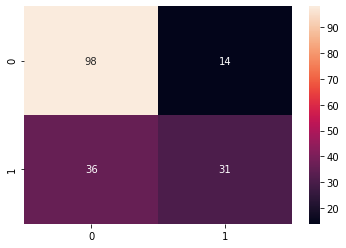

In [31]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_val,y_val_pred),annot=True,cbar=True)

#혼동 행렬 - 예측값과 실제값을 2*2표현한 것

# (예측값)
# False     FN                  TN
#          (False Nega)       (True Nega)

# True      TP                  FP
#          (True Posi)     (False Posi)

#          True               False   (실제값)


#정밀도(precision) True로 예측한 분석 대상 중에 실제값도 True 비율, 정밀도가 높다는 것은 False Posi오류가 작다는 의미
#precision = TP/(TP+FP)


#재현율(Recall) 실제 True중에서 True로 예측하여 모형이 적중한 비율, 재현율이 높다는 것은 False Nega오류가 작다는 의미
#recall =   TP/(FN+TP)



In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, roc_auc_score

print(accuracy_score(y_val,y_val_pred))
print(precision_score(y_val,y_val_pred))
print(recall_score(y_val,y_val_pred))
print(roc_auc_score(y_val,y_val_pred))

0.7206703910614525
0.6888888888888889
0.4626865671641791
0.6688432835820896


In [35]:
y_test_pred= lr_model.predict(X_test)

submission['Survived']= y_test_pred.astype(int)




In [37]:
submission.to_csv("titanic/Zaur_001.csv",index=False)